# Solow Model

The Solow model is an exogenous growth model used for analyzing GDP. In the Solow model, it is the supply side that determines the level of output, which stems from capital, techonology and labour. We assume that all the population is working, the economy is closed and time is discrete. 
In the production function we assume constant return to scale, positive but decreasing marginal products for capital and labour and positive cross derivatives.

**Model Setup**

$Y_t$: Total output 

$L_t$: Labour

$K_t$: Physical capital 

$A_t$: Technology 

$S_t$: Total savings 

$\alpha$: Share of output coming from capital

$\gamma$: Depreciation rate 

$g$: Technological growth

$n$: Population growth

$s$: Savings rate


**Import Packages**

In [17]:
import numpy as np
from scipy import optimize
from scipy.optimize import root
import sympy as sm
from scipy.optimize import root_scalar
from sympy.solvers import solve
import matplotlib.pyplot as plt 

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

**Standard Solow Model with technological growth**

In the standard Solow we consider the following variables:  

1. $K_t$ is physical capital
2. $L_t$ is labour 
3. $A_t$ is technology 
4. $Y_t = F(K_t,A_tL_t)$ is GDP
5. $S_t$ is savings

*We define GDP with a Cobb-Douglas function* 
 
$$ Y_t = K_t^\alpha (A_t L_t)^{1-\alpha}, \quad 0 < \alpha < 1 $$

*Savings is a constant fraction of GDP*

$$ S_t = sY_t, \quad 0 < s < 1 $$

*Accumulation of technology* 

$$ A_{t+1} = (1+g)A_t, \quad \text{where } A_0 \text{ is given.} $$

*Accumulation of labour* 

$$ L_{t+1} = (1+n)L_t, \quad \text{where } L_0 \text { is given.} $$

*Accumulation of physical capital* 

$$ K_{t+1} = S_t + (1 - \delta) K_t, \quad 0 < \delta < 1, \quad \text{where } K_0 \text{ is given.} $$

*Capital pr. effective worker*

$$ \tilde{k}_t = \frac{K_t}{A_{t}L_{t}} = \frac{k_t}{A_t}$$

*GDP pr. effective worker*

$$ \tilde{y}_t = \frac{Y_t}{A_{t}L_{t}} = \frac{y_t}{A_t}$$

*Transition equation*

$$ \tilde{k}_{t+1}= \frac{1}{(1+n)(1+g)}[s\tilde{k}_{t}^{\alpha}+(1-\delta)\tilde{k}_{t}] $$




# Analytical solution of the standard Solow Model

In [2]:
# We define our variables and symbols 
k = sm.symbols('k')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s = sm.symbols('s')
g = sm.symbols('g')
n = sm.symbols('n')
y = sm.symbols('y')
A = sm.symbols('A')
kstar = sm.symbols('k^*')
ystar = sm.symbols('y^*')


In [3]:
# Solving the steady state for k
ss = sm.Eq(k, (s*k**alpha+(1-delta)*k)/((1+n)*(1+g)))
kss = sm.solve(ss,k)[0]
sm.Eq(kstar,kss)

Eq(k^*, ((delta + g*n + g + n)/s)**(1/(alpha - 1)))

In [4]:
# Solving the steady state for y
yss = kss**alpha
sm.Eq(ystar,kss**alpha)


Eq(y^*, (((delta + g*n + g + n)/s)**(1/(alpha - 1)))**alpha)

In [5]:
# Turning the solution into a Python function for k
kss_p = sm.lambdify((s,g,n,delta,alpha), kss)
kss2 = kss_p(0.2,0.02,0.01,0.1,1/3) # These values are taken from Problem Set 6
print(f'k^* = {kss2:.3f}')

k^* = 1.904


In [6]:
# Turning the solution into a Python function for y
yss_p = sm.lambdify((s,g,n,delta,alpha), yss)
yss2 = yss_p(0.2,0.02,0.01,0.1,1/3)
print(f'y^* = {yss2:.3f}')

y^* = 1.239


# Numerical Solution

In [7]:
# Define the parameter values as used above 
s, g, n, delta, alpha = 0.2, 0.02, 0.01, 0.1, 1/3

# Define objective function
f = lambda k: k**alpha
obj_kss = lambda kss: kss - (s*f(kss) + (1-delta)*kss)/((1+g)*(1+n))

# Find steady state numerically for k using root-finding with `optimize.root_scalar`.
result = optimize.root_scalar(obj_kss, bracket=[0.1, 100], method='brentq')
kss = result.root

# Print result
print(f"The steady state for k is {kss:.3f}")

The steady state for k is 1.904


In [8]:
# Compute steady state for y based on the code above
yss = kss ** alpha

# Print result
print(f"The steady state for y is {yss:.3f}")

The steady state for y is 1.239


# Solow Model with human capital

**Solow model with human capital**

Now we expand the standard model to include human capital. Human capital is abilities attached to each worker, which is associated with productivity. This e.g. education, experience, health, IQ, personality and so forth. From macro courses we know that including human capital in this expanded Solow model, can be seen as an expansion of capital, which is now constituted by both physcial and human capital.
In the model there are constant return to scale for H, K and L, as well as positive but decreasing marginal product in the same variables.

**New variables in the model**

$H_t$: Human capital

$\phi$: Share of output attributed to human capital

$s_K$: Fraction of saving in physical capital 

$s_H$: Fraction of saving in human capital

In the Solow model with human capital we consider the following variables:  

1. $K_t$ is physical capital
2. $L_t$ is labour 
3. $A_t$ is technology 
4. $Y_t = F(K_t,H_t,A_tL_t)$ is GDP
5. $S_t$ is savings
6. $H_t$ is human capital

*We define GDP with a Cobb-Douglas function* 
 
$$ Y_t=K_{t}^{\alpha}H_{t}^{\phi}(A_{t}L_{t})^{1-\alpha-\phi}, \quad  0 < {\alpha} < 1, \quad 0 < {\phi} < 1 $$

*Savings is now split into savings in physical capital and savings in human capital*

$$ S_t = (s_K+s_H)Y_t, \quad s_H + s_K < 1 $$

*Accumulation of technology* 

$$ A_{t+1} = (1+g)A_t, \quad \text{where } A_0 \text{ is given.} $$

*Accumulation of labour* 

$$ L_{t+1} = (1+n)L_t, \quad \text{where } L_0 \text{ is given.} $$

*Accumulation of physical capital* 

$$ K_{t+1} = s_KY_t+(1-\delta)K_t, \quad   0 < {\delta} < 1 , \quad \text{where } K_0 \text{ is given.}$$

*Accumulation of human capital* 

$$ H_{t+1} = s_HY_t+(1-\delta)H_t, \quad  0 < {\delta} < 1 , \quad \text{where } H_0 \text{ is given.}$$

*Physical capital pr. effective worker*

$$ \tilde{k}_t = \frac{K_t}{A_{t}L_{t}} = \frac{k_t}{A_t}$$

*GDP pr. effective worker*

$$ \tilde{y}_t = \frac{Y_t}{A_{t}L_{t}} = \frac{y_t}{A_t}$$

*Human capital pr. effective worker*

$$ \tilde{h}_t = \frac{H_t}{A_{t}L_{t}} = \frac{h_t}{A_t}$$

*Transition equation physical capital*

$$ \tilde{k}_{t+1}= \frac{s_K\tilde{k}_{t}^{\alpha}\tilde{h}_{t}^{\phi}+(1-\delta)\tilde{k}_{t}}{(1+n)(1+g)} $$

*Transition equation human capital*

$$\tilde{h}_{t+1}= \frac{s_H\tilde{k}_{t}^{\alpha}\tilde{h}_{t}^{\phi}+(1-\delta)\tilde{h}_{t}}{(1+n)(1+g)} $$

*Solow equation for physical capital*

$$ \tilde{k}_{t+1}-\tilde{k} = \frac{s_K\tilde{k}_{t}^{\alpha}\tilde{h}_{t}^{\phi}-(n+g+\delta+ng)\tilde{k}_{t}}{(1+n)(1+g)} $$

*Solow equation for human capital*

$$ \tilde{h}_{t+1}-\tilde{h} = \frac{s_H\tilde{k}_{t}^{\alpha}\tilde{h}_{t}^{\phi}-(n+g+\delta+ng)\tilde{h}_{t}}{(1+n)(1+g)} $$

*In steady state we know that $\tilde{k}_{t+1}=\tilde{k_t}=\tilde{k^*}$ and $\tilde{h}_{t+1}=\tilde{h_t}=\tilde{h^*}$ which implies that the left hand side of the two Solow equations equals zero*


# Analytical solution of the Solow model with human capital

**BY RUNNING THE CODE BELOW, THE OTHER CODES WANT WORK. FOR THAT REASON, EITHER DON'T RUN THIS CODE, OR YOU HAVE TO RUN ALL THE CODE ABOVE ONE MORE TIME, AND THEN SKIP THIS CODE**

In [10]:
# We define our variables and symbols 
k = sm.symbols('k')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
g = sm.symbols('g')
n = sm.symbols('n')
y = sm.symbols('y')
h = sm.symbols('h')
sk = sm.symbols('sk')
sh = sm.symbols('sh')
phi = sm.symbols('phi')

# Define the two steady state equations 
sshk = sm.Eq(k,(sk*k**alpha*h**phi-(n+g+delta+n*g)*k)/((1+n)*(1+g)))
sshh = sm.Eq(h,(sh*k**alpha*h**phi-(n+g+delta+n*g)*h)/((1+n)*(1+g)))

#Solving the steady state equations for k and h
steady = sm.solve((sshk,sshh),(k,h))[0]
display(steady)

# checking the validity of the soloution for (0,0) for both k and h
validity = sshk.subs([(k, 0), (h, 0)]) and sshh.subs([(k, 0), (h, 0)])
print(validity)



NotImplementedError: could not solve k*(g + 1)*(n + 1) + k*(delta + g*n + g + n) - k**alpha*sk*(((delta + 2*g*n + 2*g + 2*n + 1)/(k**alpha*sh))**(1/(phi - 1)))**phi

Creates an error. Seems like python can't solve the problem analytically, and hence we proceed to solve the model numerically.

# Numerical solution of the Solow model with human capital

In [16]:
# Add the parametervalues not already defined 
sh, sk, phi = 0.1, 0.1, 1/3

# Define the functions for k and h for the steady state
def h_func(k, sh, sk, alpha, phi, delta, h, n, g):
    return sh * k**alpha * h**phi + (1 - delta - n - g) * h - h

def k_func(h, sh, sk, alpha, phi, delta, k, n, g):
    return sk * k**alpha * h**phi + (1 - delta - n - g) * k - k

# Define the objective function
def obj(x, sh, sk, alpha, phi, delta, n, g):
    k, h = x
    return [h_func(k, sh, sk, alpha, phi, delta, h, n, g), k_func(h, sh, sk, alpha, phi, delta, k, n, g)]

# Using the root solver
sol = root(obj, [1, 1], args=(sh, sk, alpha, phi, delta, n, g))

# Print the results for k and h
steady_k, steady_h = sol.x
print(f'Steady state value for k*: {steady_k:.3f}') 
print(f'Steady state value for h*: {steady_h:.3f}')


Steady state value for k*: 0.455
Steady state value for h*: 0.455


In this section we tried to determine if the analytical and numerical solutions were equal, but we encontered a problem where we could not obtain an exact value in the analytical solution only in the numerical solution. We obtained value of (0.0) in the analytical which indicates that our value h* and k* are in steady-state, we obtained an exact numerical value in the numerical solution where we have k*=0.455 and h*=0.455 in steady state.

**Creating a phase diagram for the steady state values**

Text(0.5, 1.0, 'Phase Diagram')

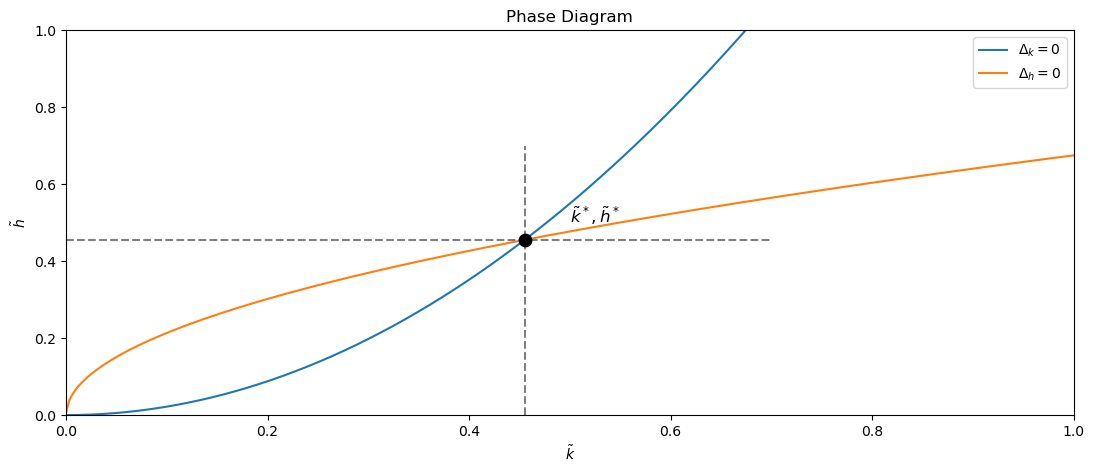

In [21]:
# Define function
def ss(sh,sk,g,n,alpha,phi,delta):
    # Grids
    k_vec = np.linspace(1e-4,3,1000)

    # Solve for in grid
    # Create empty lists
    h_vec_deltak0 = []
    h_vec_deltah0 = []
    
    # Loop through values
    for k in k_vec:
        # Solve for delta_h=0
        h = optimize.brentq(lambda h: -h_func(k, sh, sk, alpha, phi, delta, h, n, g), 1e-20, 50)
        h_vec_deltah0.append(h)

        # Solve for delta_k=0
        h = optimize.brentq(lambda h: -k_func(h, sh, sk, alpha, phi, delta, k, n, g), 1e-20, 50)
        h_vec_deltak0.append(h)

    h_vec_deltah0 = np.array(h_vec_deltah0)
    h_vec_deltak0 = np.array(h_vec_deltak0)

    return k_vec, h_vec_deltak0, h_vec_deltah0

# Solve the function
k_vec, h_vec_deltak0, h_vec_deltah0 = ss(sh,sk,g,n,alpha,phi,delta)


# Create the plot
fig, ax = plt.subplots(figsize=(13, 5))
ax.plot(k_vec, h_vec_deltak0, label=r'$\Delta_k=0$')
ax.plot(k_vec, h_vec_deltah0, label=r'$\Delta_h=0$')
ax.set_xlabel(r'$\tilde{k}$')
ax.set_ylabel(r'$\tilde{h}$')
ax.legend()

# Steady state
ax.scatter(sol.x[1], sol.x[0], color='black', s=80, zorder=2.5)

# Draw lines to the axes
ax.axvline(sol.x[1], ymax=0.7, color='gray', linestyle='--')
ax.axhline(sol.x[0], xmax=0.7, color='gray', linestyle='--')

# Add text to the plot
ax.text(0.5, 0.5, r'$\tilde{k}^*, \tilde{h}^*$', fontsize=12)

# Axis limits
ax.set(xlim=(0, 1), ylim=(0, 1))

# Title
ax.set_title('Phase Diagram')


We use the brentq function to find the corresponding value of $k$ that maximize output. k_vec contains the possible value $k$, h_vec_deltak0 contais the value of $h$ that maximuze output when $\Delta_k=0$ which mean change capital = 0, and h_vec_dealth0 contains the values of $h$ that maximize output when $\Delta_h=0$ which mean labor = 0
The phasediagram shows consistens results to numerical results. 

**Now we look how an increase in savings in human capital affects the steady state, through a phase diagram**

Text(0.5, 1.0, 'Phase Diagram sh=0.13')

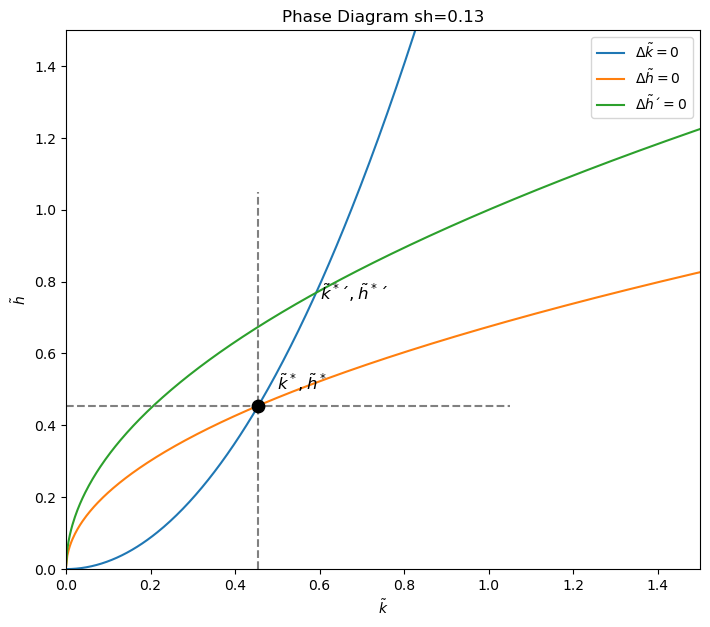

In [22]:
# Define function with sh=0.13
k_vec1,h_vec_deltak01, h_vec_deltah01 = ss(0.13,sk,g,n,alpha,phi,delta)

# Create a plot
fig2 = plt.figure(figsize=(18,7))
ax = fig2.add_subplot(1,2,1)
ax.plot(k_vec,h_vec_deltak0, label=r'$\Delta \tilde{k}=0$')
ax.plot(k_vec,h_vec_deltah0, label=r'$\Delta \tilde{h}=0$')
ax.plot(k_vec1,h_vec_deltah01, label=r'$\Delta \tilde{h}´=0$')
ax.set_xlabel(r'$\tilde{k}$')
ax.set_ylabel(r'$\tilde{h}$')
ax.legend()

# Plot the intersection point
plt.scatter(sol.x[1],sol.x[0],color='black',s=80,zorder=2.5)

# Adding locus
plt.axvline(sol.x[1],ymax=0.7,color='gray',linestyle='--') 
plt.axhline(sol.x[0],xmax=0.7,color='gray',linestyle='--')

# Text is added to the plot
ax.text(0.5, 0.5, r'$\tilde{k}^*, \tilde{h}^*$', fontsize=12)
ax.text(0.6, 0.75, r'$\tilde{k}^*´, \tilde{h}^*$´', fontsize=12)

# The axis values are chosen
ax.set(xlim=(0, 1.5), ylim=(0, 1.5)) 

# Title 
ax.set_title('Phase Diagram sh=0.13')

In this section we try to see what happens when the saving rate "sh" rises. The phasediagram shows both k and h rise of a results from higher "sh" value. The intuition behind this result is that an increase in savings in human capital improve the productivity of the workers, which then increase the return to physical capital, and hence increase investment in physical capital. These effects both improves the productivity which increases output, and hence increase the steady state values. We tried to make a point for the new intersection, but we didn't succeed.

# Solow model with human capital, with a CES production function

**Solow model with human capital in a CES production function**

The Cobb-Douglas production function is a special case of the CES production function when $\sigma$ = 1. When $\sigma=0$ we have a Leontief production function, and when $\sigma=\infty$ we have a linear production function. In a CES production function we therefore have a $0<\sigma<1$ and $1<\sigma<\infty$

We have the same variables as before:

1. $K_t$ is physical capital
2. $L_t$ is labour 
3. $A_t$ is technology 
4. $Y_t = F(K_t,H_t,A_tL_t)$ is GDP
5. $S_t$ is savings
6. $H_t$ is human capital

*CES production function with human capital*

$$
Y_t = \left[\alpha K_t^{\frac{\sigma-1}{\sigma}} + \phi H_t^{\frac{\sigma-1}{\sigma}} + (1 - \alpha - \phi) (AL_t)^{\frac{\sigma-1}{\sigma}}\right]^{\frac{\sigma-1}{\sigma}}
$$


*We have the same equations as before for the capital accumulation equations and the technological progress and labor force growth.*

We still have these: 
*Physical capital pr. effective worker*

$$ \tilde{k}_t = \frac{K_t}{A_{t}L_{t}} = \frac{k_t}{A_t}$$

*Human capital pr. effective worker*

$$ \tilde{h}_t = \frac{H_t}{A_{t}L_{t}} = \frac{h_t}{A_t}$$

*Then with the new CES production function, we get GDP pr. effective worker as*

$$ \tilde{y}_t = \frac{Y_t}{A_{t}L_{t}} = \frac{y_t}{A_t} = \left[\alpha \tilde{k}_{t}^{\frac{\sigma-1}{\sigma}}+\phi\tilde{h}_{t}^{\frac{\sigma-1}{\sigma}}+(1-\alpha-\phi)\right]^{\frac{\sigma}{\sigma-1}}
$$

*To achieve the transition equations, we then plot in the GDP pr. effective worker into these two capital accumulation equations*

*Accumulation of physical capital* 

$$ K_{t+1} = s_KY_t+(1-\delta)K_t, \quad   0 < {\delta} < 1 , \quad \text{where } K_0 \text{ is given.}$$

*Accumulation of human capital* 

$$ H_{t+1} = s_HY_t+(1-\delta)H_t, \quad  0 < {\delta} < 1 , \quad \text{where } H_0 \text{ is given.}$$

*We then end up with the following transition equations*

$$ \tilde{k}_{t+1} = \frac{1}{(1+n)(1+g)}\left[s_K\left[\left[\alpha \tilde{k}_{t}^{\frac{\sigma-1}{\sigma}}+\phi \tilde{h}_{t}^{\frac{\sigma-1}{\sigma}}+(1-\alpha-\phi)\right]^{\frac{\sigma}{\sigma-1}}\right]+(1-\delta)\tilde{k}_{t}\right]
$$

$$ \tilde{h}_{t+1} = \frac{1}{(1+n)(1+g)}\left[s_H\left[\left[\alpha \tilde{k}_{t}^{\frac{\sigma-1}{\sigma}}+\phi \tilde{h}_{t}^{\frac{\sigma-1}{\sigma}}+(1-\alpha-\phi)\right]^{\frac{\sigma}{\sigma-1}}\right]+(1-\delta)\tilde{h}_{t}\right]
$$

*Solow equation for physical capital*

$$ \tilde{k}_{t+1} - \tilde{k}_{t}= \frac{1}{(1+n)(1+g)}\left[s_K\left[\left[\alpha \tilde{k}_{t}^{\frac{\sigma-1}{\sigma}}+\phi \tilde{h}_{t}^{\frac{\sigma-1}{\sigma}}+(1-\alpha-\phi)\right]^{\frac{\sigma}{\sigma-1}}\right]-(n+g+\delta+ng)\tilde{k}_{t}\right]
$$

*Solow equation for human capital*

$$ \tilde{h}_{t+1} - \tilde{h}_{t}= \frac{1}{(1+n)(1+g)}\left[s_H\left[\left[\alpha \tilde{k}_{t}^{\frac{\sigma-1}{\sigma}}+\phi \tilde{h}_{t}^{\frac{\sigma-1}{\sigma}}+(1-\alpha-\phi)\right]^{\frac{\sigma}{\sigma-1}}\right]-(n+g+\delta+ng)\tilde{h}_{t}\right]
$$

*In steady state we know that $\tilde{k}_{t+1}=\tilde{k_t}=\tilde{k^*}$ and $\tilde{h}_{t+1}=\tilde{h_t}=\tilde{h^*}$ which implies that the left hand side of the two Solow equations equals zero*

$$ 0 = \frac{1}{(1+n)(1+g)}\left[s_K\left[\left[\alpha \tilde{k}_{t}^{\frac{\sigma-1}{\sigma}}+\phi \tilde{h}_{t}^{\frac{\sigma-1}{\sigma}}+(1-\alpha-\phi)\right]^{\frac{\sigma}{\sigma-1}}\right]-(n+g+\delta+ng)\tilde{k}_{t}\right]
$$

$$ 0 = \frac{1}{(1+n)(1+g)}\left[s_H\left[\left[\alpha \tilde{k}_{t}^{\frac{\sigma-1}{\sigma}}+\phi \tilde{h}_{t}^{\frac{\sigma-1}{\sigma}}+(1-\alpha-\phi)\right]^{\frac{\sigma}{\sigma-1}}\right]-(n+g+\delta+ng)\tilde{h}_{t}\right]
$$

*From isolating we get the following steady state equations* 

$$ \tilde{k^*} = \left[\frac{{1-\alpha-\phi}}{{\left(\frac{{n+g+\delta}}{{s_K}}\right)^{\frac{{\sigma-1}}{{\sigma}}} - \phi\left(\frac{{s_H}}{{s_K}}\right)^{\frac{{\sigma-1}}{{\sigma}}} - \alpha}}\right]^{\frac{{\sigma}}{{\sigma-1}}} $$

$$ \tilde{h^*} = \left[\frac{{1-\alpha-\phi}}{{\left(\frac{{n+g+\delta}}{{s_H}}\right)^{\frac{{\sigma-1}}{{\sigma}}} - \alpha\left(\frac{{s_K}}{{s_H}}\right)^{\frac{{\sigma-1}}{{\sigma}}} - \phi}}\right]^{\frac{{\sigma}}{{\sigma-1}}} $$



# Numerical Solution of the Solow Model with human capital, with a CES production function

In [10]:
# Define the parameter values as used above, and a value for sigma 
s, g, n, delta, alpha, phi, sk, sh, sigma = 0.2, 0.02, 0.01, 0.1, 1/3, 1/3, 0.1, 0.1, 1.5

# Define the transition equations 
def cestransition(vars):
    kbar, hbar = vars
    tces_k = ((1/((1+n)*(1+g)))*(sk*((alpha*kbar**((sigma-1)/sigma)+phi*hbar**((sigma-1)/(sigma))+(1-alpha-phi))**(sigma/(sigma-1)))-(n+g+delta+n*g)*kbar))
    tces_h = ((1/((1+n)*(1+g)))*(sh*((alpha*hbar**((sigma-1)/sigma)+phi*kbar**((sigma-1)/(sigma))+(1-alpha-phi))**(sigma/(sigma-1)))-(n+g+delta+n*g)*hbar))
    return [tces_k, tces_h]

# Solve the equation system
initial_guess = [0.1, 0.1]  # Initial guess for kbar and hbar
solution = optimize.root(cestransition, initial_guess)

# Extract the values of kbar and hbar from the solution
kbar = solution.x[0]
hbar = solution.x[1]

print(f'The steady state for k is {round(kbar, 3)}')
print(f'The steady state for h is {round(hbar, 3)}')


The steady state for k is 0.481
The steady state for h is 0.481


We then proceed to see how sigma is influencing the steady state values of k and h. We now that as $\sigma$ approaches 1, we are moving towards a Cobb-Douglas production function, and as $\sigma$ approaches 0, we are moving towards a Leontief production function. Therefore we set our sigma values above 1, to avoid issues with the steady state values. A higher $\sigma$ value, implies easier substitution between factors, and vice versa for lower $\sigma$. 

In [38]:
from tabulate import tabulate

# Define the transition equations
def equations(vars, sigma):
    kbar, hbar = vars
    tces_k = ((1/((1+n)*(1+g)))*(sk*((alpha*kbar**((sigma-1)/sigma)+phi*hbar**((sigma-1)/(sigma))+(1-alpha-phi))**(sigma/(sigma-1)))-(n+g+delta+n*g)*kbar))
    tces_h = ((1/((1+n)*(1+g)))*(sh*((alpha*hbar**((sigma-1)/sigma)+phi*kbar**((sigma-1)/(sigma))+(1-alpha-phi))**(sigma/(sigma-1)))-(n+g+delta+n*g)*hbar))
    return [tces_k, tces_h]

# Define the sigma values to loop through
sigma_values = np.array([1.25, 1.5, 1.75])

# Solve the equation system for each sigma value
for sigma in sigma_values:
    # Solve the equation system
    initial_guess = [0.1, 0.1]  # Initial guess for kbar and hbar
    solution = optimize.root(equations, initial_guess, args=(sigma,))

    # Extract the values of kbar and hbar from the solution
    kbar = solution.x[0]
    hbar = solution.x[1]

    print(f"The steady state for k* (when sigma={sigma}) is {kbar:.3f}")
    print(f"The steady state for h* (when sigma={sigma}) is {hbar:.3f}")
    print()


The steady state for k* (when sigma=1.25) is 0.100
The steady state for h* (when sigma=1.25) is 0.100

The steady state for k* (when sigma=1.5) is 0.481
The steady state for h* (when sigma=1.5) is 0.481

The steady state for k* (when sigma=1.75) is 0.489
The steady state for h* (when sigma=1.75) is 0.489



/var/folders/tr/r80xfl3j0_j5bsdrblc1w4v80000gn/T/ipykernel_36737/25813863.py:4: RuntimeWarning: invalid value encountered in double_scalars
  tces_k = ((1/((1+n)*(1+g)))*(sk*((alpha*kbar**((sigma-1)/sigma)+phi*hbar**((sigma-1)/(sigma))+(1-alpha-phi))**(sigma/(sigma-1)))-(n+g+delta+n*g)*kbar))
/var/folders/tr/r80xfl3j0_j5bsdrblc1w4v80000gn/T/ipykernel_36737/25813863.py:5: RuntimeWarning: invalid value encountered in double_scalars
  tces_h = ((1/((1+n)*(1+g)))*(sh*((alpha*hbar**((sigma-1)/sigma)+phi*kbar**((sigma-1)/(sigma))+(1-alpha-phi))**(sigma/(sigma-1)))-(n+g+delta+n*g)*hbar))


From the result above, we can see that there seems to be a problem with convergence when $\sigma$<1.5. For that reason we try to investigate our solution function, to check whether the solver can find a steady state solution for $\sigma$ in the interval [0.1;2.5].

In [48]:
# Define the transition equations
def equations(vars, sigma):
    kbar, hbar = vars
    tces_k = ((1/((1+n)*(1+g)))*(sk*((alpha*kbar**((sigma-1)/sigma)+phi*hbar**((sigma-1)/(sigma))+(1-alpha-phi))**(sigma/(sigma-1)))-(n+g+delta+n*g)*kbar))
    tces_h = ((1/((1+n)*(1+g)))*(sh*((alpha*hbar**((sigma-1)/sigma)+phi*kbar**((sigma-1)/(sigma))+(1-alpha-phi))**(sigma/(sigma-1)))-(n+g+delta+n*g)*hbar))
    return [tces_k, tces_h]

# Define the sigma values to loop through
sigma_values_convergence = np.linspace(0.1, 2.5, 20)

# Solve the equation system for each sigma value
# Create empty lists for the kbar and hbar values
kbar_values = []
hbar_values = []
for sigma in sigma_values_convergence:
    # Solve the equation system
    initial_guess = [0.1, 0.1]  # Initial guess for kbar and hbar
    solution = optimize.root(equations, initial_guess, args=(sigma,))

    # Extract the values of kbar and hbar from the solution
    kbar_con = solution.x[0]
    hbar_con = solution.x[1]
    
    # Append the results to the lists
    kbar_values.append(kbar)
    hbar_values.append(hbar)

# Print to see if the solution converges
    print(f"Sigma: {sigma:.2f} | Solution Status: {solution.success}")

Sigma: 0.10 | Solution Status: True
Sigma: 0.23 | Solution Status: False
Sigma: 0.35 | Solution Status: False
Sigma: 0.48 | Solution Status: False
Sigma: 0.61 | Solution Status: False
Sigma: 0.73 | Solution Status: False
Sigma: 0.86 | Solution Status: False
Sigma: 0.98 | Solution Status: False
Sigma: 1.11 | Solution Status: False
Sigma: 1.24 | Solution Status: False
Sigma: 1.36 | Solution Status: False
Sigma: 1.49 | Solution Status: True
Sigma: 1.62 | Solution Status: True
Sigma: 1.74 | Solution Status: True
Sigma: 1.87 | Solution Status: True
Sigma: 1.99 | Solution Status: True
Sigma: 2.12 | Solution Status: True
Sigma: 2.25 | Solution Status: True
Sigma: 2.37 | Solution Status: True
Sigma: 2.50 | Solution Status: True


/var/folders/tr/r80xfl3j0_j5bsdrblc1w4v80000gn/T/ipykernel_36737/3306576565.py:4: RuntimeWarning: invalid value encountered in double_scalars
  tces_k = ((1/((1+n)*(1+g)))*(sk*((alpha*kbar**((sigma-1)/sigma)+phi*hbar**((sigma-1)/(sigma))+(1-alpha-phi))**(sigma/(sigma-1)))-(n+g+delta+n*g)*kbar))
/var/folders/tr/r80xfl3j0_j5bsdrblc1w4v80000gn/T/ipykernel_36737/3306576565.py:5: RuntimeWarning: invalid value encountered in double_scalars
  tces_h = ((1/((1+n)*(1+g)))*(sh*((alpha*hbar**((sigma-1)/sigma)+phi*kbar**((sigma-1)/(sigma))+(1-alpha-phi))**(sigma/(sigma-1)))-(n+g+delta+n*g)*hbar))
/var/folders/tr/r80xfl3j0_j5bsdrblc1w4v80000gn/T/ipykernel_36737/3306576565.py:4: RuntimeWarning: overflow encountered in double_scalars
  tces_k = ((1/((1+n)*(1+g)))*(sk*((alpha*kbar**((sigma-1)/sigma)+phi*hbar**((sigma-1)/(sigma))+(1-alpha-phi))**(sigma/(sigma-1)))-(n+g+delta+n*g)*kbar))
/var/folders/tr/r80xfl3j0_j5bsdrblc1w4v80000gn/T/ipykernel_36737/3306576565.py:5: RuntimeWarning: overflow encountere

From the output, it seems as there is no convergence for $\sigma$ values less than 1.5, and hence we look how the steady state value of k and h, depends on $\sigma$, with $\sigma$ [1.5;2.5]. This could also have been plotted, which would have shown a sudden jump in the steady state values.

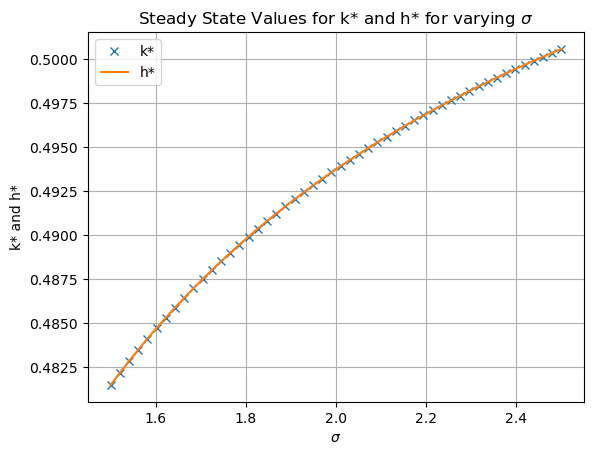

In [49]:
# We continue with the same parametervalues as defined earlier

# Define the transition equations
def equations(vars, sigma):
    kbar, hbar = vars
    tces_k = ((1/((1+n)*(1+g)))*(sk*((alpha*kbar**((sigma-1)/sigma)+phi*hbar**((sigma-1)/(sigma))+(1-alpha-phi))**(sigma/(sigma-1)))-(n+g+delta+n*g)*kbar))
    tces_h = ((1/((1+n)*(1+g)))*(sh*((alpha*hbar**((sigma-1)/sigma)+phi*kbar**((sigma-1)/(sigma))+(1-alpha-phi))**(sigma/(sigma-1)))-(n+g+delta+n*g)*hbar))
    return [tces_k, tces_h]

# Define the sigma values to loop through
sigma_values = np.linspace(1.5, 2.5, 50)

# Solve the equation system for each sigma value
# Create empty lists for the kbar and hbar values
kbar_values = []
hbar_values = []
for sigma in sigma_values:
    # Solve the equation system
    initial_guess = [0.1, 0.1]  # Initial guess for kbar and hbar
    solution = optimize.root(equations, initial_guess, args=(sigma,))

    # Extract the values of kbar and hbar from the solution
    kbar = solution.x[0]
    hbar = solution.x[1]
    # Append the results to the lists
    kbar_values.append(kbar)
    hbar_values.append(hbar)

# Plot kbar as crosses and hbar as a line against sigma, to be able to see both variables in the plot
plt.plot(sigma_values, kbar_values, 'x', label='k*')
plt.plot(sigma_values, hbar_values, label='h*')
plt.xlabel('$\sigma$')
plt.ylabel('k* and h*')
plt.title('Steady State Values for k* and h* for varying $\sigma$')
plt.legend()
plt.grid(True)
plt.show()


From the graph we see that the steady state values for k and h is increasing in sigma. The intuition behind this result, is that when $\sigma$ increases, the substitutability between the factors enhances, and hence improve ressource allocation, and thereby increase productivity and total output.

Now, we check if the results from the numerical solution, is equal to the computed solution using the Solow equations. Again we check for different $\sigma$ values. We chech for more $\sigma$ values, to get a graph that looks like the one above.

In [50]:
# Define the sigma values to compute tces_sk and tces_sh
sigma_solow = np.array([1.25, 1.50, 1.75, 2.00])

# Compute tces_sk and tces_sh for each sigma value
# Create empty lists
tces_sk_values = []
tces_sh_values = []
# Loop through the sigma values 
for sigma in sigma_solow:
    tces_sk = ((1-alpha-phi)/(((n+g+delta+n*g)/sh)**((sigma-1)/sigma)-phi*(sh/sk)**((sigma-1)/sigma)-alpha))**(sigma/(sigma-1))
    tces_sh = ((1-alpha-phi)/(((n+g+delta+n*g)/sh)**((sigma-1)/sigma)-alpha*(sk/sh)**((sigma-1)/sigma)-phi))**(sigma/(sigma-1))
    # Append the values to the empty lists
    tces_sk_values.append(tces_sk)
    tces_sh_values.append(tces_sh)

# Print the computed values for tces_sk and tces_sh
for i, sigma in enumerate(sigma_solow):
    print(f"The steady state for k* (sigma={sigma}) is {tces_sk_values[i]:.3f}")
    print(f"The steady state for h* (sigma={sigma}) is {tces_sh_values[i]:.3f}")
    print()


The steady state for k* (sigma=1.25) is 0.471
The steady state for h* (sigma=1.25) is 0.471

The steady state for k* (sigma=1.5) is 0.481
The steady state for h* (sigma=1.5) is 0.481

The steady state for k* (sigma=1.75) is 0.489
The steady state for h* (sigma=1.75) is 0.489

The steady state for k* (sigma=2.0) is 0.494
The steady state for h* (sigma=2.0) is 0.494



We notice, that it is the same steady state values as with the numerical solutions. We then plot the steady state values for a vector of $\sigma$ values.

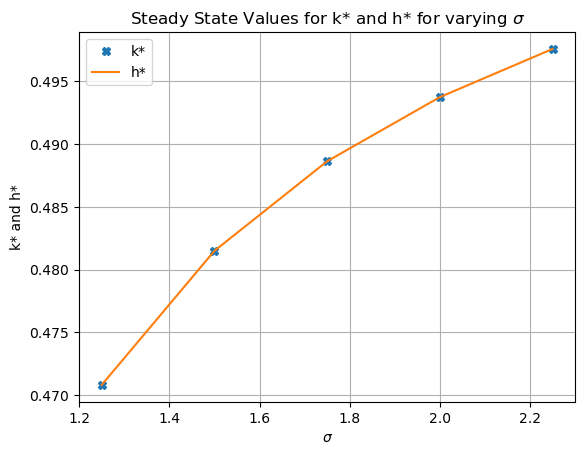

In [51]:

# Define the sigma values to compute tces_sk and tces_sh
sigma_values = np.array([1.25, 1.5, 1.75, 2.0,2.25])

# Compute tces_sk and tces_sh for each sigma value
tces_sk_values = []
tces_sh_values = []
for sigma in sigma_values:
    tces_sk = ((1-alpha-phi)/(((n+g+delta+n*g)/sh)**((sigma-1)/sigma)-phi*(sh/sk)**((sigma-1)/sigma)-alpha))**(sigma/(sigma-1))
    tces_sh = ((1-alpha-phi)/(((n+g+delta+n*g)/sh)**((sigma-1)/sigma)-alpha*(sk/sh)**((sigma-1)/sigma)-phi))**(sigma/(sigma-1))
    tces_sk_values.append(tces_sk)
    tces_sh_values.append(tces_sh)

# Plot tces_sk and tces_sh against sigma
plt.plot(sigma_values, tces_sk_values, 'X', label='k*')
plt.plot(sigma_values, tces_sh_values, label='h*')
plt.xlabel('$\sigma$')
plt.ylabel('k* and h*')
plt.title('Steady State Values for k* and h* for varying $\sigma$')
plt.legend()
plt.grid(True)
plt.show()


Again we notice that this gives us the same results as before. The figure is uneven, because we have discrete values.